In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv("preprocessed_dataset.csv")
df = df.set_index('date')

df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# !pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q transformers
!pip install -q datasets
!pip install -q evaluate
!pip install -q accelerate
!pip install -q gluonts ujson

Metrics with different hyperparameter values

In [ ]:
import itertools
combinations = list(itertools.product([30,2*30,3*30],[60,120,180],[0.0005,0.001,0.005]))

from rnn_hyperparam import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('RNN')
for combination in combinations:
    base_model = RnnModel(df, unit_type="base", seq_len=combination[0], n_units=combination[1], lr=combination[2])
    base_model.train(epochs=100, batch_size=combination[0])

    base_mase_results = mase_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column], training=base_model.X_train[0])
    base_smape_metric = smape_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column])

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')
     
dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(dict)

df_results.to_csv('hyperparameter_results_RNN.csv')

In [ ]:
import itertools
combinations = list(itertools.product([30,2*30,3*30],[60,120,180],[0.0005,0.001,0.005]))

from rnn_hyperparam import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('LSTM')
for combination in combinations:
    base_model = RnnModel(df, unit_type="lstm", seq_len=combination[0], n_units=combination[1], lr=combination[2])
    base_model.train(epochs=100, batch_size=combination[0])

    base_mase_results = mase_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column], training=base_model.X_train[0])
    base_smape_metric = smape_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column])

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')
    
dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(dict)

df_results.to_csv('hyperparameter_results_LSTM.csv')

Testing with next year

[60, 60, 0.0005]
Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.0727
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0230
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0119
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 9/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0110
Epoch 10/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 11/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 12/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0107
Epoch 13/100
19/19 [

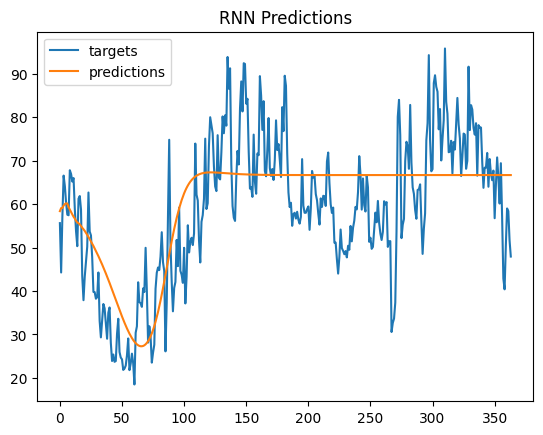

In [8]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_RNN.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="base", seq_len=opt[0], n_units=opt[1], lr=opt[2])
base_model.train(epochs=100, batch_size=opt[0])

base_mase_results = mase_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column], training=base_model.X_train[0])
base_smape_metric = smape_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column])

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()

[60, 120, 0.001]
Epoch 1/100
19/19 [==============================] - 2s 31ms/step - loss: 0.0945
Epoch 2/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0152
Epoch 3/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0117
Epoch 4/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0105
Epoch 5/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0101
Epoch 6/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0100
Epoch 7/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0098
Epoch 8/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0097
Epoch 9/100
19/19 [==============================] - 1s 33ms/step - loss: 0.0099
Epoch 10/100
19/19 [==============================] - 1s 31ms/step - loss: 0.0097
Epoch 11/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0098
Epoch 12/100
19/19 [==============================] - 1s 34ms/step - loss: 0.0096
Epoch 13

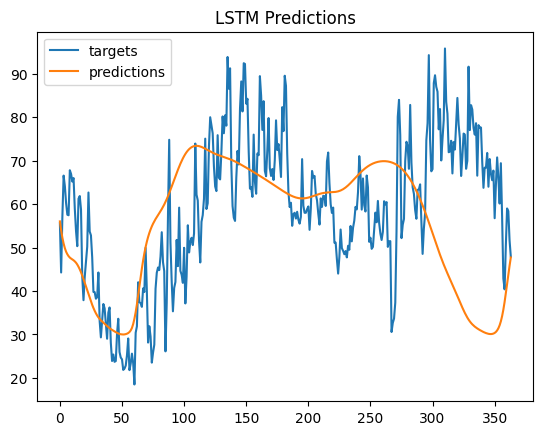

In [16]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_LSTM.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="lstm", seq_len=opt[0], n_units=opt[1], lr=opt[2])
base_model.train(epochs=100, batch_size=opt[0])

base_mase_results = mase_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column], training=base_model.X_train[0])
base_smape_metric = smape_metric.compute(references=base_model.validation_target[:, base_model.target_column], predictions=base_model.validation_predictions[:, base_model.target_column])

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()